<a href="https://colab.research.google.com/github/rerebebeccacca/20210602-machine-learing/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()


In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [43]:
names = [
          "airplane",									
          "automobile",							
          "bird",				
          "cat",								
          "deer",									
          "dog",									
          "frog",										
          "horse",										
          "ship",									
          "truck"
]

1


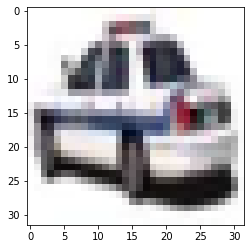

In [44]:
#上次mlp.ipynb的內容是： mnist數據集裡y_train：(60000, )[5,2,1,0]
'''
minist y_train 的shape是（60000，），cifar的y_train shape 是（50000，1）
mnist (60000, ) ---> [5, 2, 1, 0, ......]
cifao10 (50000, 1) ---> [[5], [2], [1], [0], ......]
'''
import matplotlib.pyplot as plt
import random
idx = random.randint(0,49999)
print(y_train[idx][0])
plt.imshow(x_train[idx])



In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D #Convolution 2D
from tensorflow.keras.layers import Dense, Flatten,Dropout#flatten平坦化（也就是攤開來3個數字相乘起來）
layers = [
          # 3 * 3 * 3(一個) ＊64 + 64(bias)=1792
          Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
          MaxPooling2D(),
          # 3 * 3 * 64(一個) ＊128 + 128(bias)=73856
          Conv2D(128, 3, activation="relu", padding="same",),
          MaxPooling2D(),
          Conv2D(256, 3, activation="relu", padding="same",),
          MaxPooling2D(),
          Conv2D(512, 3, activation="relu", padding="same",),
          MaxPooling2D(),
          Flatten(),
          Dense(32, activation="relu"),
          # 128 * 10 + 10(bias) = 1290
          Dropout(0.25),#避免過度依賴某個神經元，所以加在dense之間（accuracy準確率不一定上升）
          Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 4, 512)        

In [46]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy#可節省ram的使用
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(),
              metrics=["accuracy"])
'''
onehot做完
3 -> [0,0,0,1,0,0,0,0....]
而一般的categoricalcrossentropy做onehot會把整個列表存起來，但是中間不要的累贅0太多
但是用sparsecategoricalcrossentropy 就只會存取那個1的檔案
'''

'\nonehot做完\n3 -> [0,0,0,1,0,0,0,0....]\n而一般的categoricalcrossentropy做onehot會把整個列表存起來，但是中間不要的累贅0太多\n但是用sparsecategoricalcrossentropy 就只會存取那個1的檔案\n'

In [47]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [48]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 54000 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小, 圖片小(20*20):200, 圖片大(200*200):20)
# 200batch, 10epoch: 54000 * 10 / 200 -> 2700(梯度調整)
# verbose: 0(無聲) 1(最詳細) 2(沒有進度條)
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
# h5: https://www.hdfgroup.org/downloads/hdfview/
model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 5s - loss: 1.9140 - accuracy: 0.2795 - val_loss: 1.5207 - val_accuracy: 0.4422
Epoch 2/100
225/225 - 4s - loss: 1.5311 - accuracy: 0.4363 - val_loss: 1.2189 - val_accuracy: 0.5786
Epoch 3/100
225/225 - 4s - loss: 1.3311 - accuracy: 0.5169 - val_loss: 1.1183 - val_accuracy: 0.6126
Epoch 4/100
225/225 - 4s - loss: 1.1627 - accuracy: 0.5830 - val_loss: 0.9264 - val_accuracy: 0.6840
Epoch 5/100
225/225 - 4s - loss: 1.0365 - accuracy: 0.6328 - val_loss: 0.8495 - val_accuracy: 0.7072
Epoch 6/100
225/225 - 4s - loss: 0.9569 - accuracy: 0.6655 - val_loss: 0.8867 - val_accuracy: 0.6976
Epoch 7/100
225/225 - 4s - loss: 0.8596 - accuracy: 0.6981 - val_loss: 0.7894 - val_accuracy: 0.7360
Epoch 8/100
225/225 - 4s - loss: 0.7764 - accuracy: 0.7273 - val_loss: 0.7553 - val_accuracy: 0.7504
Epoch 9/100
225/225 - 4s - loss: 0.7062 - accuracy: 0.7511 - val_loss: 0.7320 - val_accuracy: 0.7558
Epoch 10/100
225/225 - 4s - loss: 0.6378 - accuracy: 0.7752 - val_loss: 0.7569 - val_accura

In [49]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7618 - accuracy: 0.7563


[0.7618064284324646, 0.7562999725341797]

In [54]:
pre = model.predict_classes(x_test_norm)
print(y_test.shape)#二維
print(pre.shape)#一維
# -1:叫他幫你算10000*1 = -1(?)，所以重新shape他
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000, 1)
(10000,)
(10000,)


In [55]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),765,13,98,14,19,4,8,13,43,23
automobile(正確),13,857,4,11,0,2,3,9,26,75
bird(正確),50,2,667,44,102,55,48,25,5,2
cat(正確),7,5,90,500,68,198,65,39,12,16
deer(正確),10,1,59,38,754,17,34,80,5,2
dog(正確),5,0,59,127,45,669,19,61,10,5
frog(正確),2,3,44,41,51,21,827,3,5,3
horse(正確),4,1,33,26,42,48,6,831,2,7
ship(正確),72,15,15,13,6,7,7,1,847,17
truck(正確),45,44,12,14,0,3,2,19,15,846


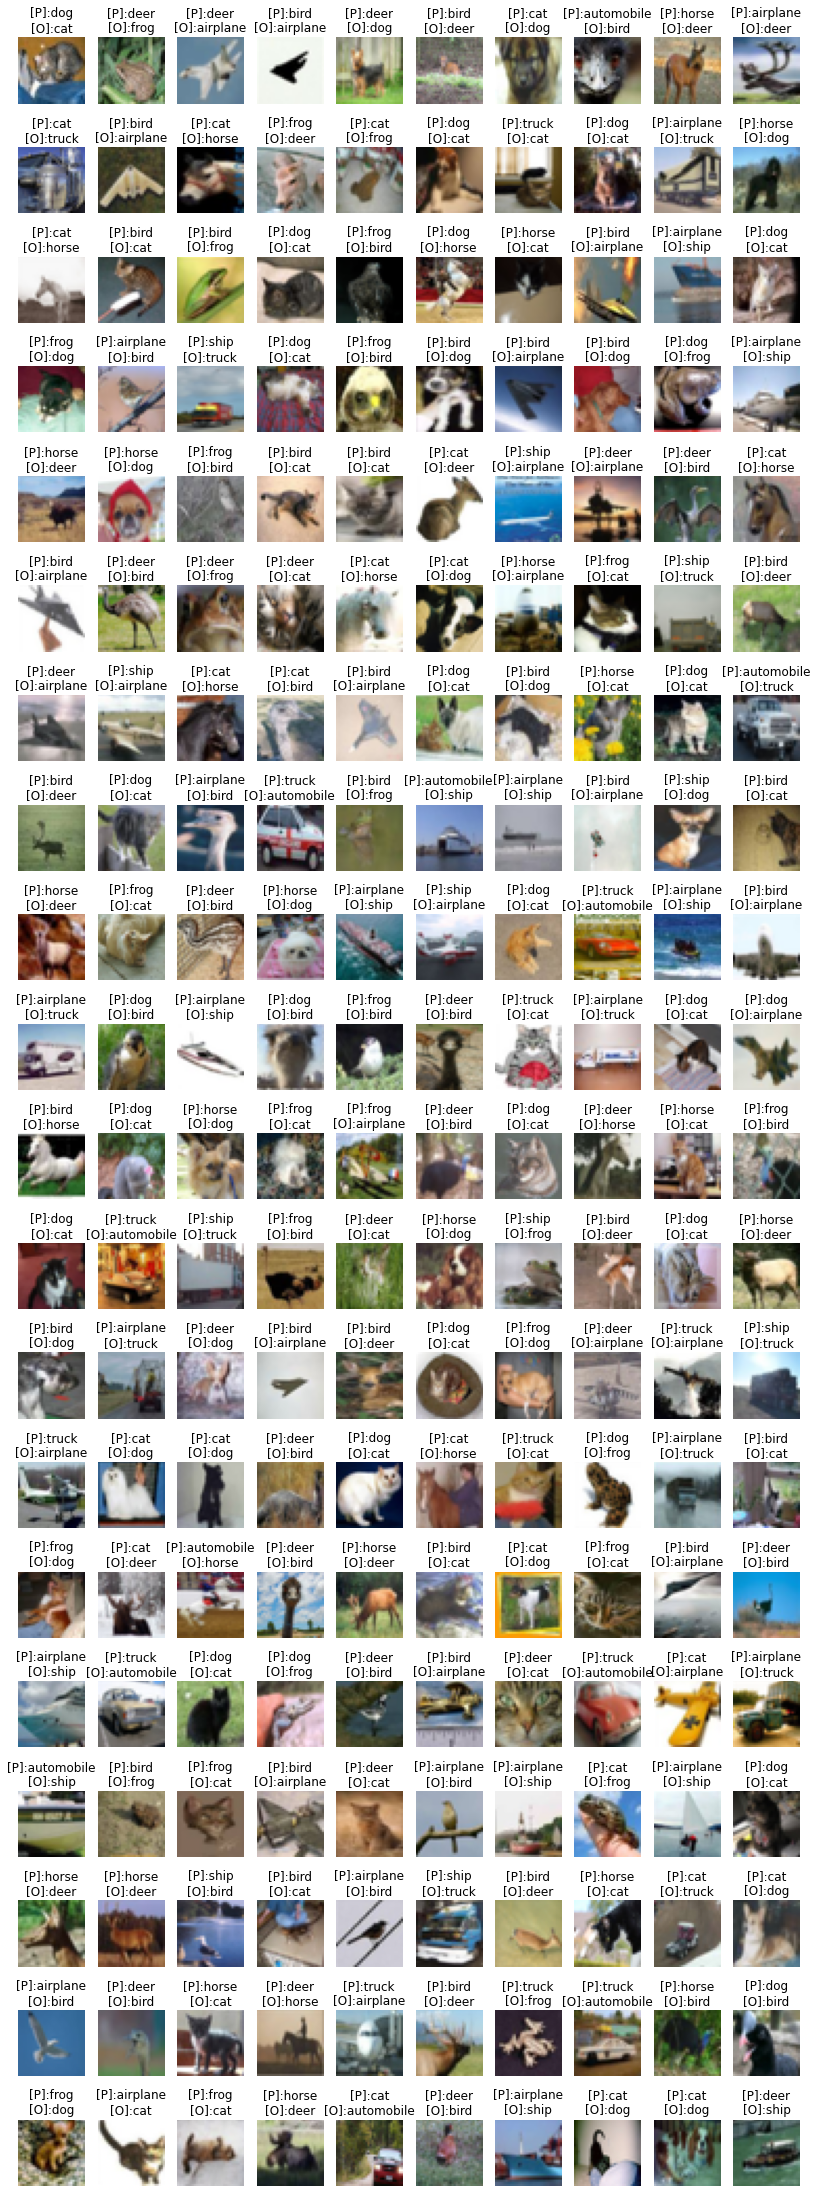

In [56]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])